In [166]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#from pandas_datareader.data import DataReader
#cpi = DataReader('CPIAUCNS', 'fred', start='1971-01', end='2016-12') cpi.index = pd.DatetimeIndex(cpi.index, freq='MS')
#inf = np.log(cpi).resample('QS').mean().diff()[1:] * 400

#plt.style.use('fivethirtyeight')

dfTB = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/Lab2.csv")

DL2 = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/dataLab2.csv")

#series = Series.from_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/Zip_Zhvi_SingleFamilyResidence")
#print(dfTB.describe())
#print(list(dfTB.columns.values))
#print(dfTB.head())



d10 = pd.date_range(start='1/1/2010', periods=12, freq='M')
d02 = pd.date_range(start='1/1/2010',periods=4, freq='Y')



d11 = pd.date_range(start='1/1/2011', periods=12, freq='M')
d12 = pd.date_range(start='1/1/2012', periods=12, freq='M')
d13 = pd.date_range(start='1/1/2013', periods=12, freq='M')
dfTB.shape

#print(DL2)
#print(dates.shape)

#print(gbState.City.unique())



LY = DL2.AvgPrice
LX = DL2.drop(['Year','AvgPrice'],axis=1)
tr = pd.Series(d01)
TX = pd.concat([tr, LX], axis=1)
TY = pd.concat([tr, LY], axis=1)
TX.index = TX[0]
TY.index = TX[0]
del TX[0]
del TY[0]


TX.plot
exog = TX
#TX.plot()
#plt.title('Labor and Employment Data')
#plt.show()
#exog.describe()
print(exog)

print(TY)

            Housing Supply  Population  labor force  employed  unemployed  \
0                                                                           
2010-12-31          270025      543976       265643    235757       29886   
2011-12-31          270820      544439       265213    236336       28877   
2012-12-31          271353      547293       262800    238006       24794   
2013-12-31          272119      550754       258529    237093       21436   

            rate  
0                 
2010-12-31  11.3  
2011-12-31  10.9  
2012-12-31   9.4  
2013-12-31   8.3  
            AvgPrice
0                   
2010-12-31  146426.0
2011-12-31  136235.0
2012-12-31  142519.0
2013-12-31  155544.0


In [153]:
#get the arkansas data 
ARdata = dfTB.loc[dfTB['State'] == "FL"]

#Brev = dfTB.loc[dfTB['CountyName'] == "Brevard"]

#ARdata = FLdata.drop(['Unnamed: 0'], axis=1)

#set it up for graph
A1a  = ARdata.loc[ARdata['CountyName'] == 'Brevard']




#print(A1a.describe())
A1b = A1a.groupby(['CountyName'])
A1c = A1b.mean()
A1d = A1c.loc['2011-01':'2011-12']
A1e = A1c.T
A1eTS = A1e.drop(A1e.index[[0,1,2,3]]).reset_index()
AleTSx = pd.DataFrame(A1eTS)
t09 = AleTSx.iloc[153:165]
t08 = AleTSx.iloc[141:153]
t07 = AleTSx.iloc[129:141]
t06 = AleTSx.iloc[117:129]

m09 = t09.mean()
m08 = t08.mean()
m07 = t07.mean()
m06 = t06.mean()

A1a.shape

#print(m09)
#print(m08)
#print(m07)
#print(m06)

#print(t09)
#print(t08)
#print(t07)
#print(t06)

data = np.array([160881.27,189948.11,241103.21,283221.03])
s = pd.Series(data)
te = pd.Series(d02)
ty = pd.concat([te, s], axis=1)
ty.columns = ['date','avgHomePrice']
ty.index = ty['date']
del ty['date']

print(ty)

            avgHomePrice
date                    
2010-12-31     160881.27
2011-12-31     189948.11
2012-12-31     241103.21
2013-12-31     283221.03


In [53]:
model = sm.OLS(LY,LX).fit()
predictions = model.predict(LX)
model.summary()
lm = linear_model.LinearRegression() 
model = lm.fit(LX,LY)
predictions = lm.predict(LX) 
print(predictions) 

[146426. 136235. 142519. 155544.]


/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1392: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - np.divide(self.nobs - self.k_constant, self.df_resid) * (1 - self.rsquared)
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1353: RuntimeWarning: divide by zero encountered in double_scalar

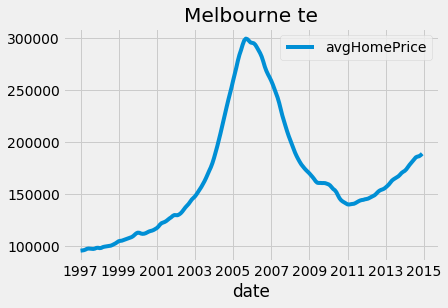

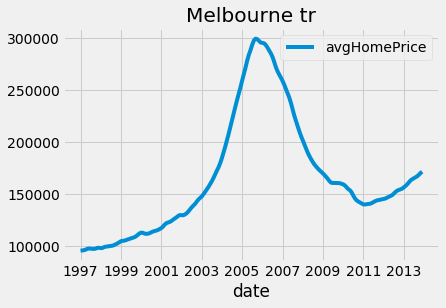

(204, 1)
(216, 1)


In [68]:


#change this after you get your data 
#there should be a function built here but i dont know how to do that yet. 

#LRts = tz Little Rock/ City
#HSts = tz Hot Springs
#FVts = tz Feyetteville
#SEts =tz  swhatever

#ORts = tz orlando
#TAts = tz tampa
#KWts = tz  Key West
#BRts = tz  Brevard
#BRCts = tz  Brevard x cities

#BRCf = tz

#ts'Melbourne' = tz # MelbourneN
#ts32931 = tz  #Cocoa Beach
#ts32951 = tz  #Melbourne Beach
TVte = te  #Melbourne
TVtr = tr  #Melbourne
#ts'Melbourne' = tz  #Melbourne


#Write to a CSV if you need to. 
#BRCts.to_csv('BRCts.csv',sep=",")

#print(ts32780)
#ts32780.to_csv('ts32780.csv')
#ts32931.to_csv('ts32931.csv')
#ts32951.to_csv('ts32951.csv')
TVte.to_csv('Melbournete.csv')
TVtr.to_csv('Melbournetr.csv')
#graph it
len(A1e)
TVte.plot()
plt.title('Melbourne te')
 
len(A1e)
TVtr.plot()
plt.title('Melbourne tr')
plt.show()

print(TVtr.shape)
print(TVte.shape)

In [167]:
#y = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/Melbournete.csv")


#y.index = y['date']
#del y['date']
#ty = pd.DataFrame(ty, dtype='float')




exog = pd.DataFrame(exog, dtype='float')
TY = pd.DataFrame(TY, dtype='float')
print(TY)

            AvgPrice
0                   
2010-12-31  146426.0
2011-12-31  136235.0
2012-12-31  142519.0
2013-12-31  155544.0


In [168]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [183]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(TY,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:67.65643583622246
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:46.585210633416054


In [184]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(TY,exog,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-95.24469886231608
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:4116.147951171283


In [195]:
mod = sm.tsa.statespace.SARIMAX(TY,exog,
                                order=(1, 0, 0),
                                seasonal_order=(0, 0, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])


                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Housing Supply   -14.3791   6.94e-13  -2.07e+13      0.000     -14.379     -14.379
Population         8.0132   4.65e-13   1.72e+13      0.000       8.013       8.013
labor force       -0.0200   3.09e-13  -6.48e+10      0.000      -0.020      -0.020
employed          -1.5734   1.72e-12  -9.12e+11      0.000      -1.573      -1.573
unemployed         1.5533   1.56e-12   9.97e+11      0.000       1.553       1.553
rate               0.0012    6.5e-16   1.84e+12      0.000       0.001       0.001
ar.L1              0.9064   1.62e-24   5.58e+23      0.000       0.906       0.906
sigma2          3.858e-18   2.97e-15      0.001      0.999   -5.82e-15    5.83e-15


In [196]:
mod = sm.tsa.statespace.SARIMAX(TY,
                                order=(1, 1, 0),
                                seasonal_order=(0, 0, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1242      0.951      0.131      0.896      -1.739       1.988
sigma2      1.035e+08   2.77e-09   3.73e+16      0.000    1.03e+08    1.03e+08


ValueError: operands could not be broadcast together with shapes (3,) (11,) 

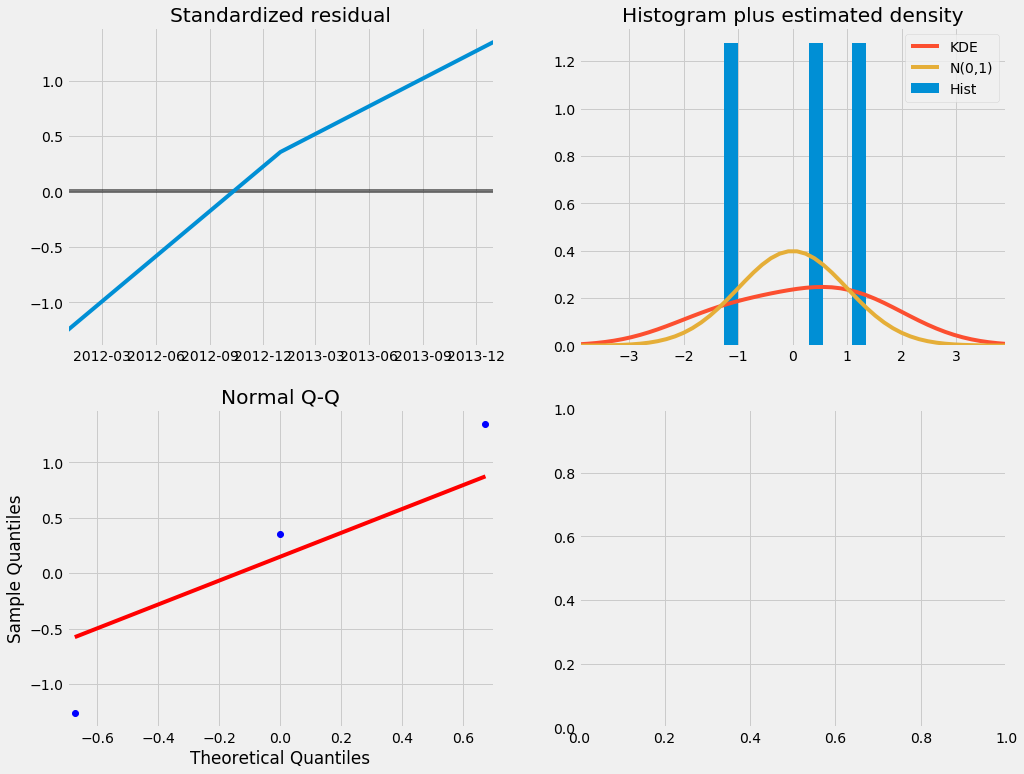

In [173]:
results.plot_diagnostics(figsize=(15, 12))
plt.title('Brevard County')
plt.show()



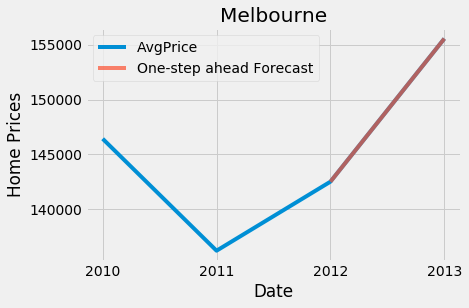

In [176]:
y = TY

pred = results.get_prediction(start=pd.to_datetime('2012-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2010-12-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Home Prices')
plt.legend()
plt.title('Melbourne')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

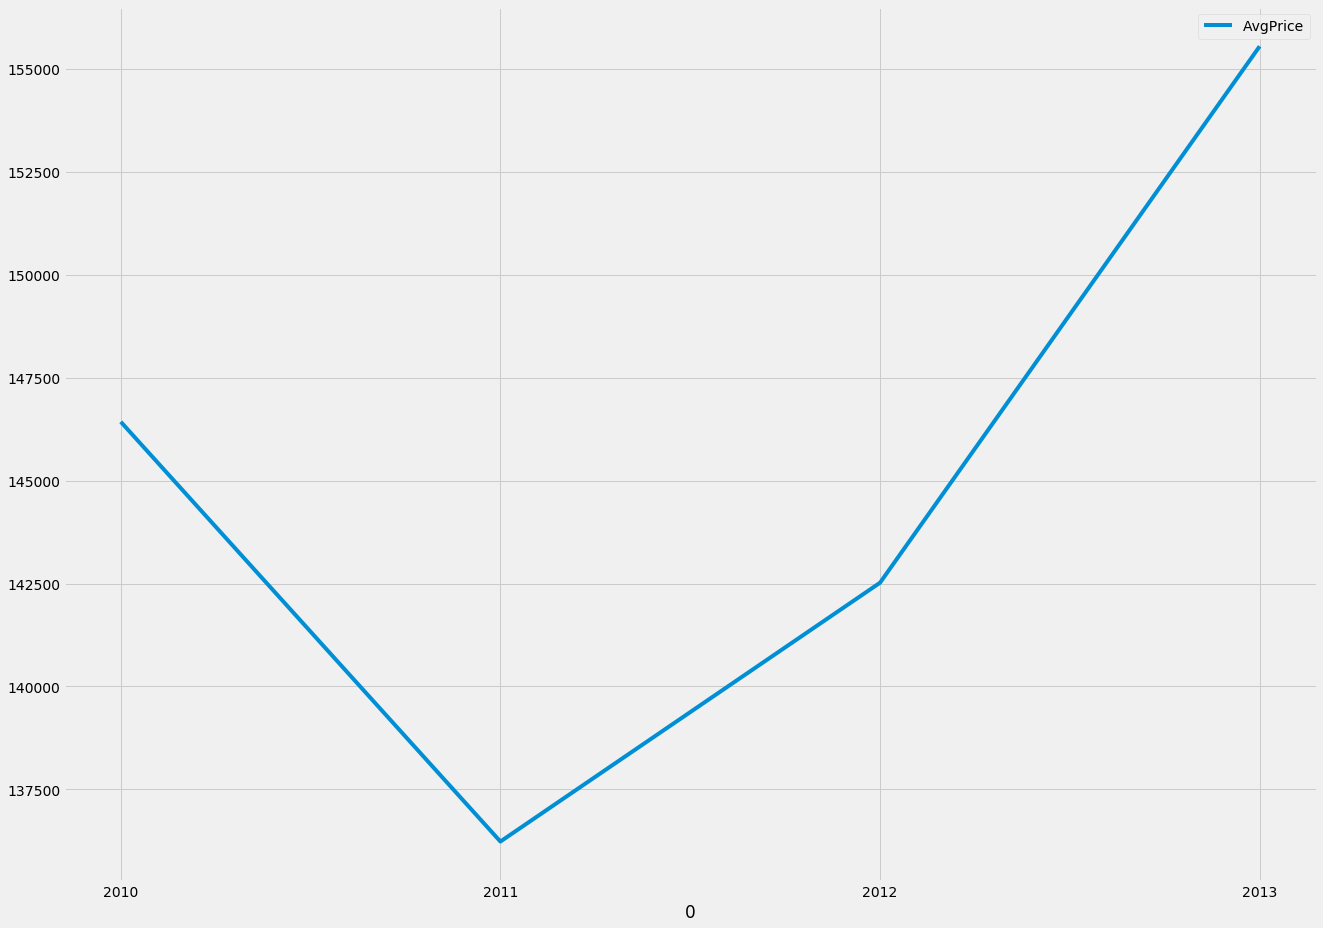

In [181]:
y = TY

pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = y['2010-12-31':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-12-31'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Home Prices Melbourne')

plt.legend()
plt.show()


y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1997-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

                             ARIMA Model Results                              
Dep. Variable:             D.AvgPrice   No. Observations:                    3
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -31.807
Method:                       css-mle   S.D. of innovations           9715.691
Date:                Thu, 31 May 2018   AIC                             69.613
Time:                        20:42:04   BIC                             66.909
Sample:                    12-31-2011   HQIC                            64.178
                         - 12-31-2013                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3144.1277   5340.253      0.589      0.661   -7322.575    1.36e+04
ar.L1.D.AvgPrice    -0.1031      0.957     -0.108      0.932      -1.978       1.772
                            

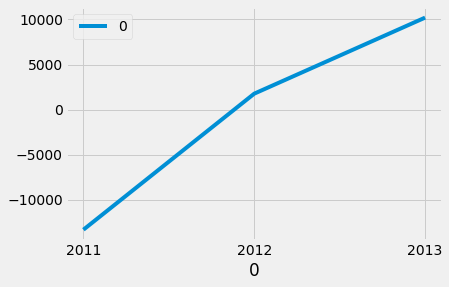

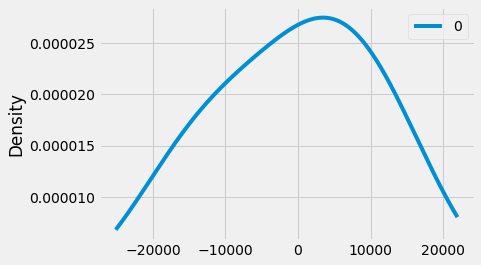

                  0
count      3.000000
mean    -455.253451
std    11925.881387
min   -13335.127705
25%    -5785.214685
50%     1764.698335
75%     5984.683675
max    10204.669016


In [182]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

#First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

model = ARIMA(TY, order=(1,1,0))
model_fit = model.fit(disp=1)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [194]:
train = TY
exog = exog

mod = sm.tsa.statespace.SARIMAX(train, exog=exog, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()

#exog_forecast = TY.loc['2013-12-31':'2014-12-31','avgHomePrice']
exog_forecast = TY.loc['2013-12-31':'2014-12-31',['avgHomePrice']]
predictions = results.predict(start = '2013-12-31', end = '2014-12-31', exog=exog, dynamic= True)



ValueError: maxlag should be < nobs